### Support Vector Regression

Генерируем данные

In [1]:
import numpy as np

a = -5
b = 5
N = 100
np.random.seed(12345)

X = np.sort(np.random.uniform(a, b, (N, 1)), axis=0)
y = np.sin(X).flatten()

Добавляем случайный шум в диапазоне [-q, q] каждые k отчетов

In [2]:
k = 5
q = 1.5
y[::5] += np.random.uniform(-q, q, N//k) #3 * (0.5 - np.random.rand(N//k))

Делим на train / test и затем сортируем по возрастанию X (для вывода графиков)

In [3]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, random_state=42, test_size=0.2)
trainX, testX, trainY, testY = \
    np.sort(trainX, axis=0), \
    np.sort(testX, axis=0), \
    trainY[np.argsort(trainX, axis=0).ravel()], \
    testY[np.argsort(testX, axis=0).ravel()]
print(f'trainX={trainX.shape}, trainY={trainY.shape}, testX={testX.shape}, testY={testY.shape}')

trainX=(80, 1), trainY=(80,), testX=(20, 1), testY=(20,)


Посмотрим на гребневую регрессию (аналог SVR, но только без epsilon) и SVR (полиномиальную и RBF) 

In [4]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

ridge_m = Ridge(random_state=42)
svr_poly_m = SVR(kernel='poly', epsilon=0.1)
svr_rbf_m = SVR(kernel='rbf', epsilon=0.1)

Зададим сетки гиперпараметров и проведем процедуру кросс-валидации

In [5]:
from sklearn.model_selection import GridSearchCV

degree_grid = [1, 3, 5]
C_grid = [100, 1000]
alpha_grid = [1 / (2*x) for x in C_grid] # Alpha corresponds to 1 / (2C)

svr_grid_rbf = { 'C' : C_grid }
svr_grid_poly = { 'C' : C_grid,
                'degree' : degree_grid }
ridge_grid = { 'alpha' : alpha_grid }

ridge = GridSearchCV (ridge_m, ridge_grid, cv=5, refit=True )
ridge.fit(trainX, trainY) 
print('Best Ridge: ', ridge.best_params_)

svr_poly = GridSearchCV (svr_poly_m, svr_grid_poly, cv=5, refit=True )
svr_poly.fit(trainX, trainY) 
print('Best SVR poly: ', svr_poly.best_params_)

svr_rbf = GridSearchCV (svr_rbf_m, svr_grid_rbf, cv=5, refit=True )
svr_rbf.fit(trainX, trainY) 
print('Best SVR RBF: ', svr_rbf.best_params_)

Best Ridge:  {'alpha': 0.005}
Best SVR poly:  {'C': 1000, 'degree': 5}
Best SVR RBF:  {'C': 100}


Посмотрим на результаты как на train, так и на test

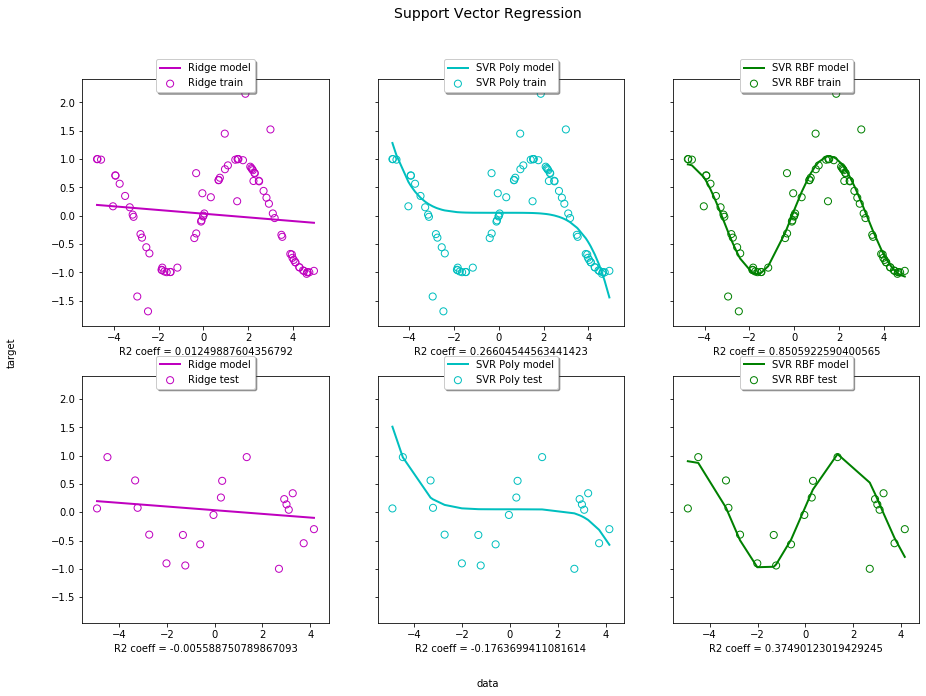

In [6]:
import matplotlib.pyplot as plt

models = [ridge, svr_poly, svr_rbf]
kernel_label = ['Ridge', 'SVR Poly', 'SVR RBF']
model_color = ['m', 'c', 'g']

# 1st row - Train, 2nd row - Test
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)

# Train
for ix, model in enumerate(models):
    axes[0, ix].plot(trainX, model.predict(trainX), color=model_color[ix], lw=2,
                  label='{} model'.format(kernel_label[ix]))
    axes[0, ix].scatter(trainX, trainY, facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} train'.format(kernel_label[ix]))
    axes[0, ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)
    axes[0, ix].set_xlabel(f'R2 coeff = {model.score(trainX, trainY)}')

# Test
for ix, model in enumerate(models):
    axes[1, ix].plot(testX, model.predict(testX), color=model_color[ix], lw=2,
                  label='{} model'.format(kernel_label[ix]))
    axes[1, ix].scatter(testX, testY, facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} test'.format(kernel_label[ix]))
    axes[1, ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)
    axes[1, ix].set_xlabel(f'R2 coeff = {model.score(testX, testY)}')
    
fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()